In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [149]:
df =pd.read_csv('IR4 fishery 3.csv')

In [150]:
df

,Technology,Year,Country,PerformanceRate,FishingTechniques,SkillsOfFisherman
0,Satellite Monitoring,2020,USA,0.85,Trawling,Navigation
1,Underwater Robotics,2021,Japan,0.92,Longlining,Robotics
2,Smart Fishing Gear,2019,Norway,0.88,Netting,Technology Integration
3,Electronic Monitoring Systems,2022,Australia,0.89,Trap Fishing,Data Analysis
4,Advanced Sonar Systems,2023,Canada,0.91,Drift Netting,Sonar Operation
...,...,...,...,...,...,...
67,Electronic Monitoring Systems,2022,Nigeria,0.90,Longlining,Data Analysis
68,Advanced Sonar Systems,2023,Egypt,0.91,Netting,Sonar Operation
69,Smart Fishing Gear,2020,Morocco,0.87,Trap Fishing,Technology Integration
70,Underwater Robotics,2021,Tunisia,0.93,Drift Netting,Robotics


In [151]:
df.columns

Index(['Technology', 'Year', 'Country', 'PerformanceRate', 'FishingTechniques',
       'SkillsOfFisherman'],
      dtype='object')

In [152]:
df.dtypes

Technology            object
Year                   int64
Country               object
PerformanceRate      float64
FishingTechniques     object
SkillsOfFisherman     object
dtype: object

In [153]:
df.isnull().sum()

Technology           0
Year                 0
Country              0
PerformanceRate      0
FishingTechniques    0
SkillsOfFisherman    0
dtype: int64

In [154]:
df = df.sort_values(by='Year', ascending=True)

In [155]:
df['FishingTechniques'].unique()

array(['Line Fishing', 'Trap Fishing', 'Longlining', 'Trawling',
       'Drift Netting', 'Netting'], dtype=object)

In [156]:
df['SkillsOfFisherman'].unique()

array(['Navigation', 'Robotics', 'Technology Integration',
       'Sonar Operation', 'Data Analysis'], dtype=object)

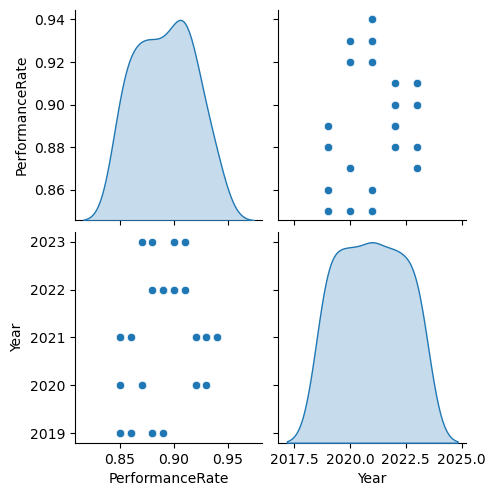

In [157]:
# Pairplot for numerical columns
sns.pairplot(df[['PerformanceRate','Year']], diag_kind='kde')
plt.show()

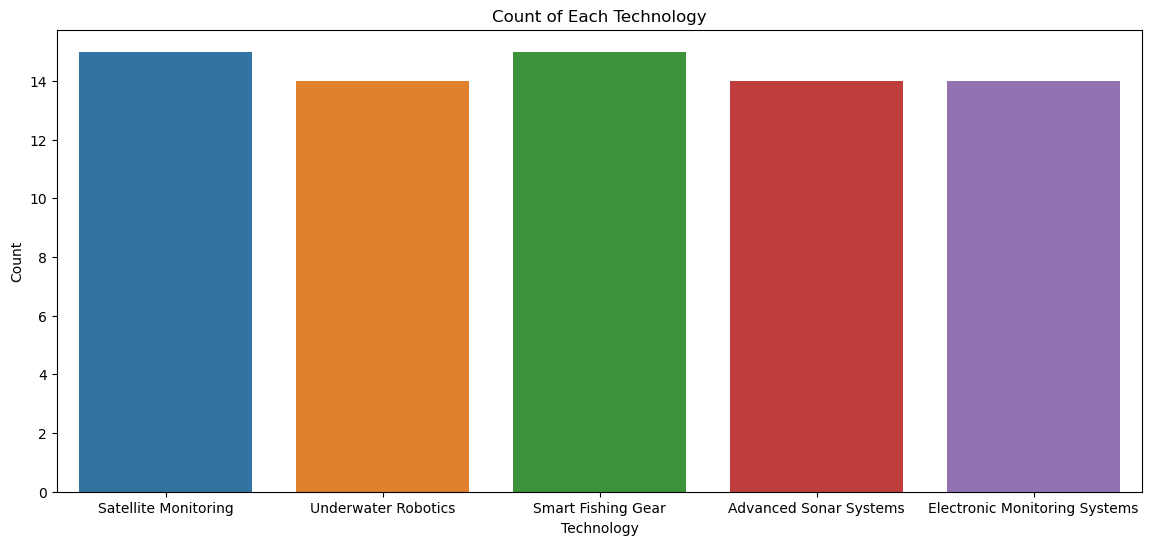

In [158]:
# Bar chart for the count of each Technology
plt.figure(figsize=(14, 6))
sns.countplot(x='Technology', data=df)
plt.title('Count of Each Technology')
plt.xlabel('Technology')
plt.ylabel('Count')
plt.show()

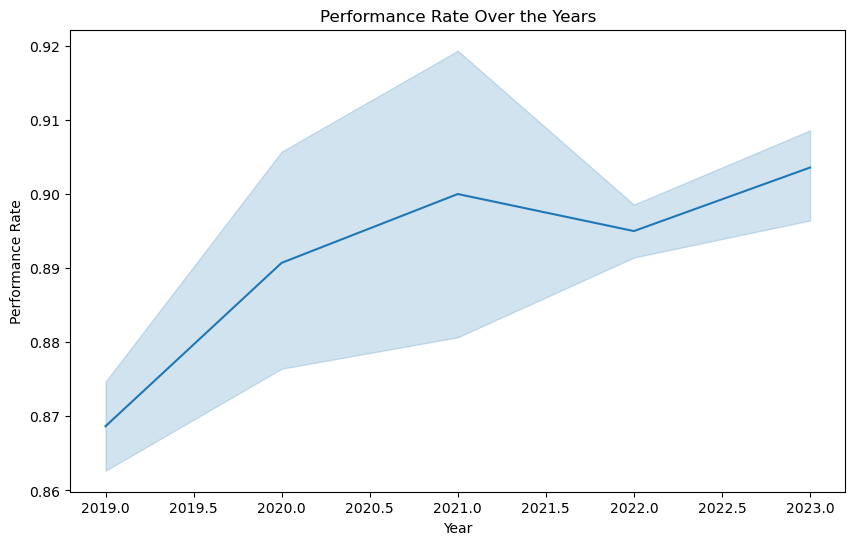

In [159]:
# Line chart for PerformanceRate over the Years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='PerformanceRate', data=df)
plt.title('Performance Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Performance Rate')
plt.show()

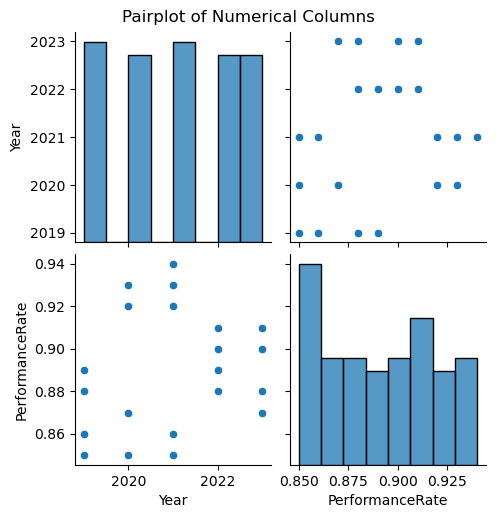

In [160]:
# Pairplot for numerical columns
sns.pairplot(df[['Year', 'PerformanceRate']])
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

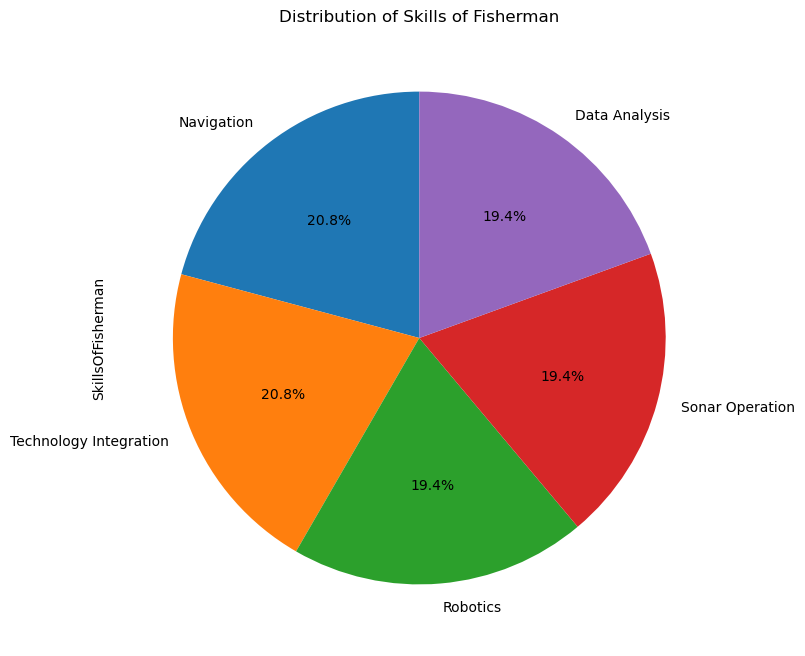

In [161]:
# Pie chart for the distribution of SkillsOfFisherman
plt.figure(figsize=(8, 8))
df['SkillsOfFisherman'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Skills of Fisherman')
plt.show()

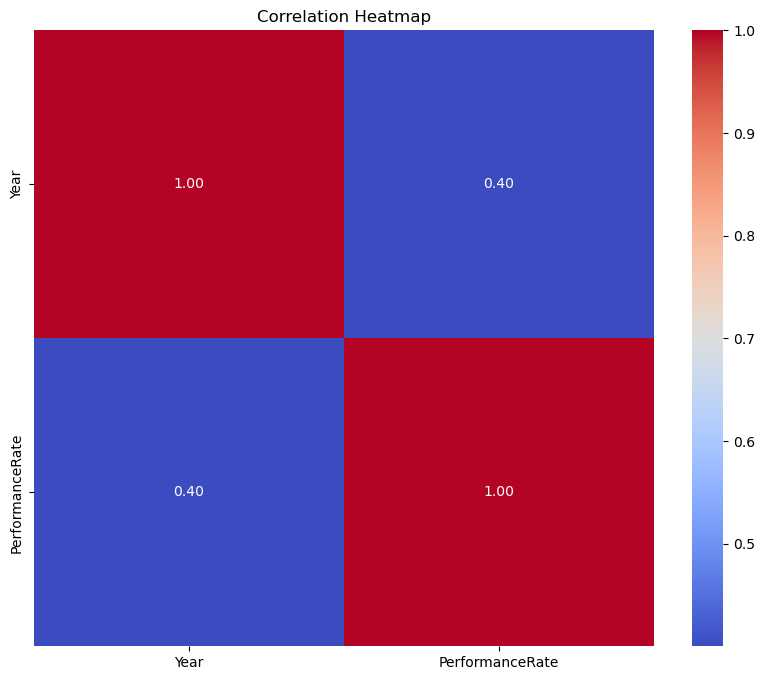

In [162]:
# Heatmap for correlation between numerical columns
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Year', 'PerformanceRate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

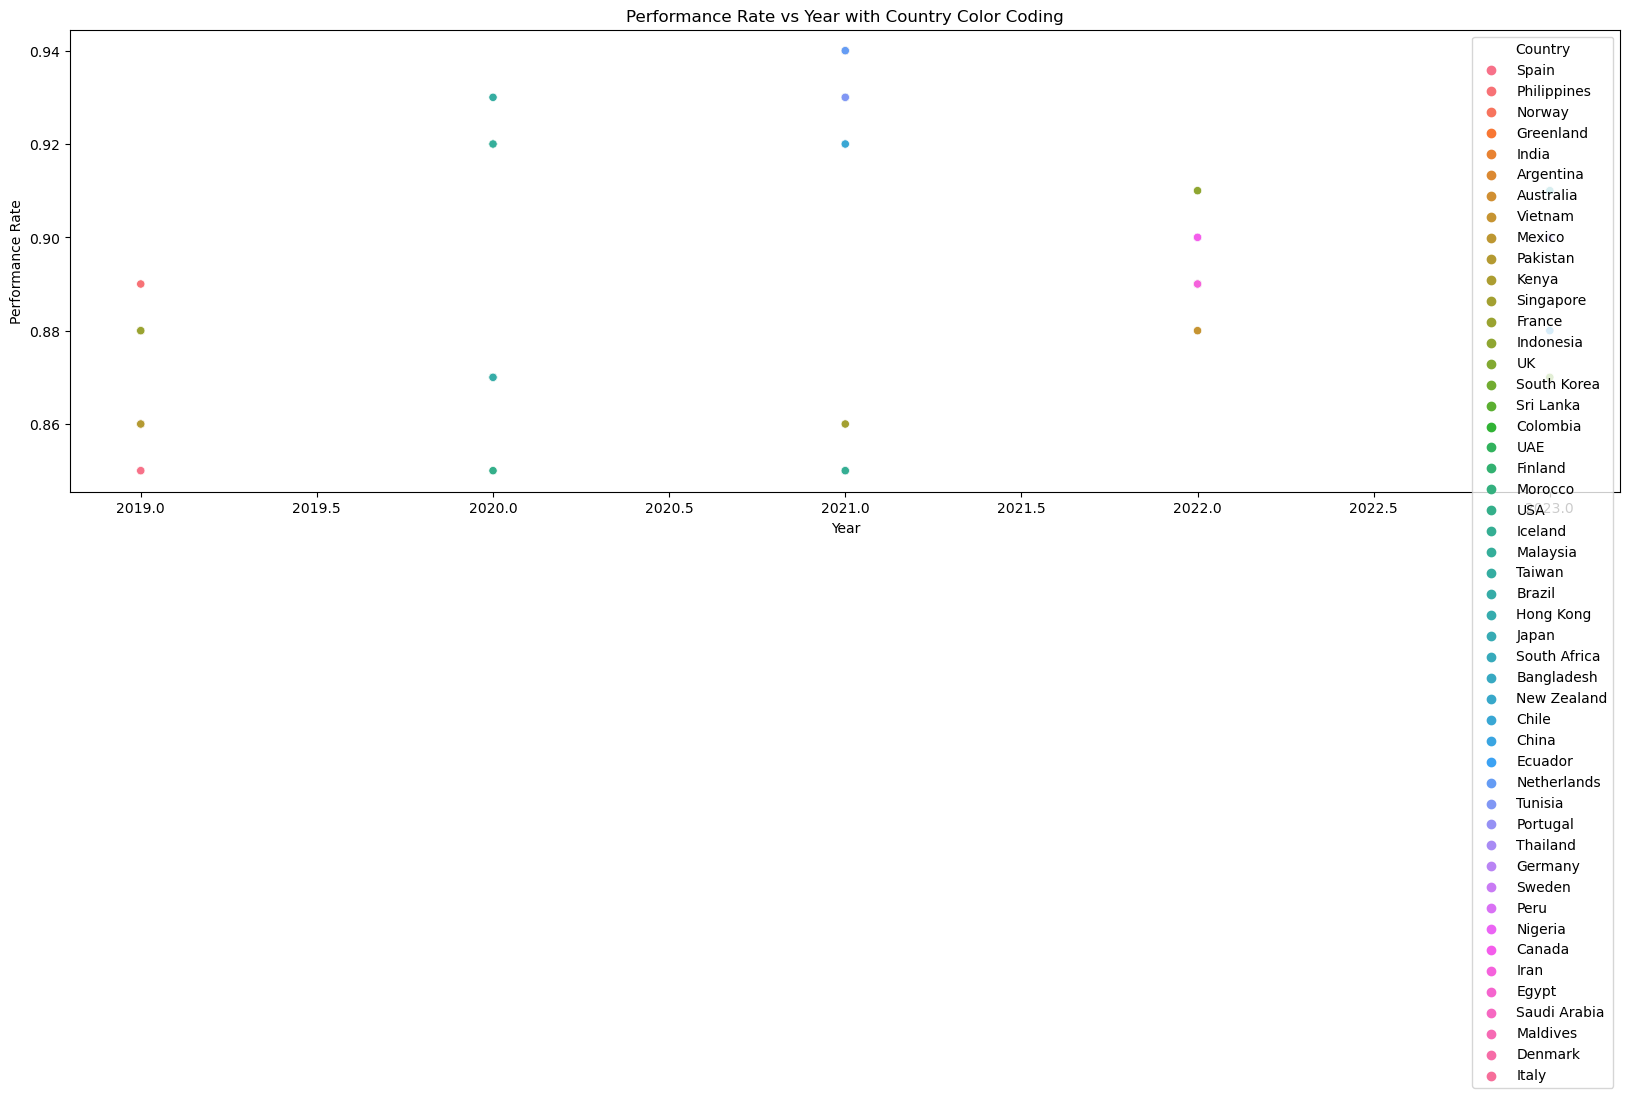

In [163]:
# Scatter plot for PerformanceRate vs Year
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Year', y='PerformanceRate', hue='Country', data=df)
plt.title('Performance Rate vs Year with Country Color Coding')
plt.xlabel('Year')
plt.ylabel('Performance Rate')
plt.show()

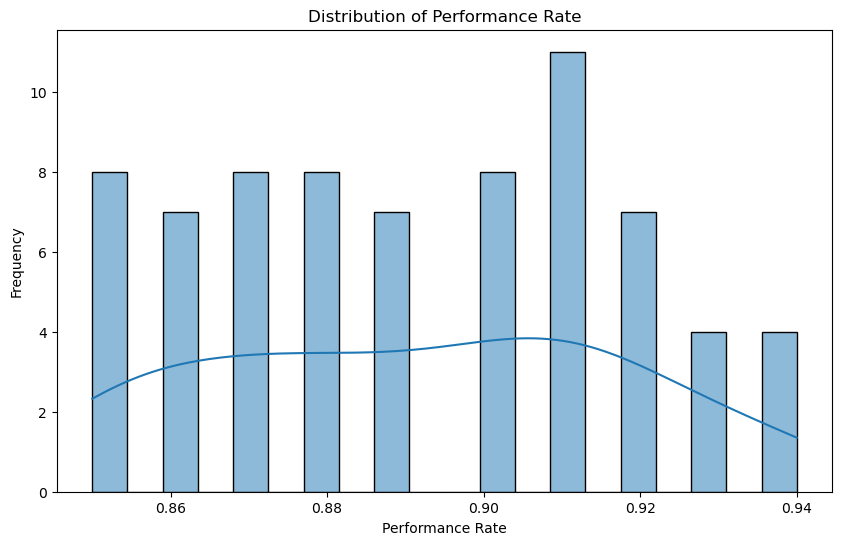

In [164]:
# Histogram for the distribution of PerformanceRate
plt.figure(figsize=(10, 6))
sns.histplot(df['PerformanceRate'], bins=20, kde=True)
plt.title('Distribution of Performance Rate')
plt.xlabel('Performance Rate')
plt.ylabel('Frequency')
plt.show()

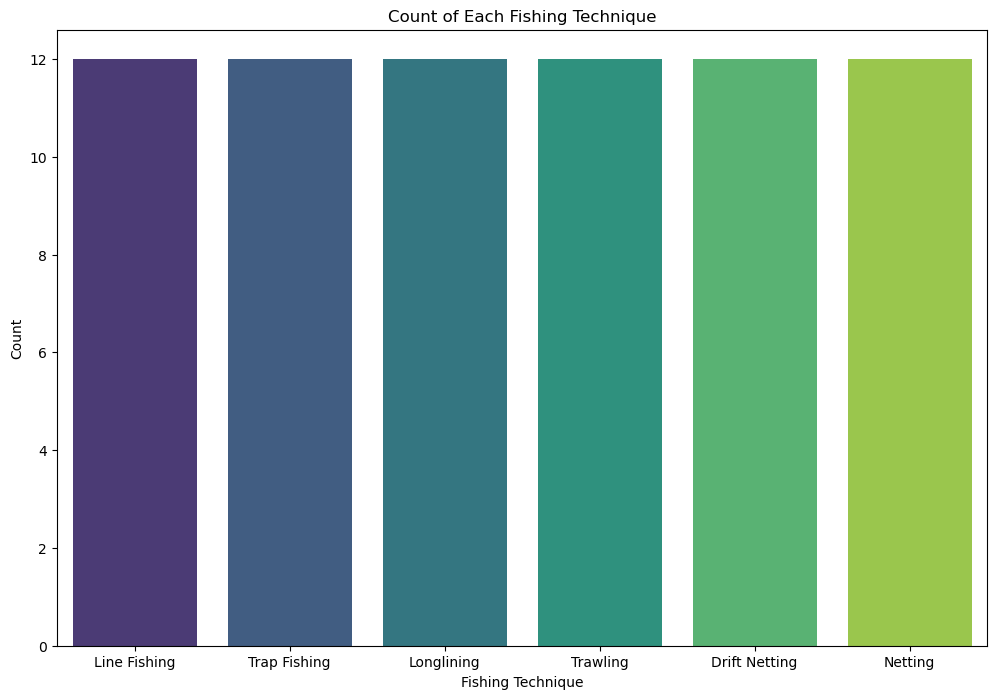

In [165]:
# Bar chart for the count of each Fishing Technique
plt.figure(figsize=(12, 8))
sns.countplot(x='FishingTechniques', data=df, palette='viridis')
plt.title('Count of Each Fishing Technique')
plt.xlabel('Fishing Technique')
plt.ylabel('Count')
plt.show()

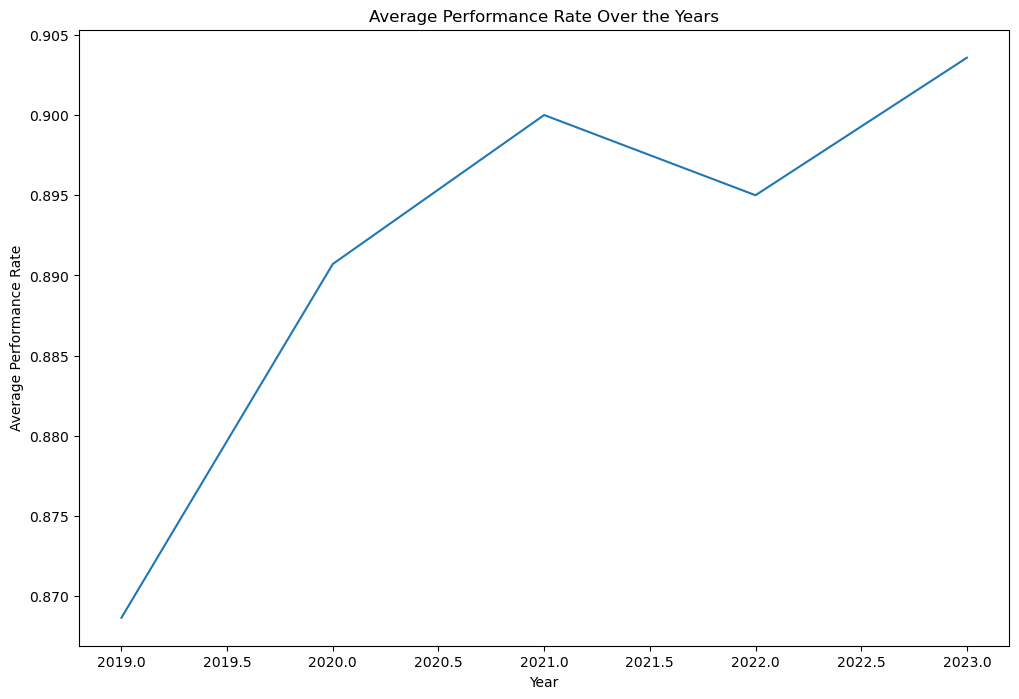

In [166]:
# Line plot for the average PerformanceRate over the years
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='PerformanceRate', data=df.groupby('Year')['PerformanceRate'].mean().reset_index())
plt.title('Average Performance Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Performance Rate')
plt.show()

In [167]:
df['Technology'].unique()

array(['Satellite Monitoring', 'Underwater Robotics',
       'Smart Fishing Gear', 'Advanced Sonar Systems',
       'Electronic Monitoring Systems'], dtype=object)

In [168]:
df['SkillsOfFisherman'].unique()

array(['Navigation', 'Robotics', 'Technology Integration',
       'Sonar Operation', 'Data Analysis'], dtype=object)

In [169]:
df['FishingTechniques'].unique()

array(['Line Fishing', 'Trap Fishing', 'Longlining', 'Trawling',
       'Drift Netting', 'Netting'], dtype=object)

In [170]:
df.columns

Index(['Technology', 'Year', 'Country', 'PerformanceRate', 'FishingTechniques',
       'SkillsOfFisherman'],
      dtype='object')

In [171]:
new_order = ['Country','Technology','Year', 'PerformanceRate','FishingTechniques', 'SkillsOfFisherman']
df = df[new_order]

df

,Country,Technology,Year,PerformanceRate,FishingTechniques,SkillsOfFisherman
71,Spain,Satellite Monitoring,2019,0.86,Line Fishing,Navigation
21,Philippines,Satellite Monitoring,2019,0.89,Trap Fishing,Navigation
31,Norway,Satellite Monitoring,2019,0.86,Longlining,Navigation
36,Greenland,Satellite Monitoring,2019,0.88,Trawling,Navigation
16,India,Satellite Monitoring,2019,0.85,Drift Netting,Navigation
...,...,...,...,...,...,...
13,South Africa,Underwater Robotics,2023,0.91,Longlining,Robotics
18,Thailand,Advanced Sonar Systems,2023,0.90,Trawling,Sonar Operation
43,Peru,Advanced Sonar Systems,2023,0.91,Longlining,Sonar Operation
28,Italy,Advanced Sonar Systems,2023,0.91,Drift Netting,Sonar Operation


In [172]:
df.corr()

C:\Users\PC\AppData\Local\Temp\ipykernel_6768\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,PerformanceRate
Year,1.000000,0.400174
PerformanceRate,0.400174,1.000000


In [173]:
X = df.iloc[:,1:-1]
X 

,Technology,Year,PerformanceRate,FishingTechniques
71,Satellite Monitoring,2019,0.86,Line Fishing
21,Satellite Monitoring,2019,0.89,Trap Fishing
31,Satellite Monitoring,2019,0.86,Longlining
36,Satellite Monitoring,2019,0.88,Trawling
16,Satellite Monitoring,2019,0.85,Drift Netting
...,...,...,...,...
13,Underwater Robotics,2023,0.91,Longlining
18,Advanced Sonar Systems,2023,0.90,Trawling
43,Advanced Sonar Systems,2023,0.91,Longlining
28,Advanced Sonar Systems,2023,0.91,Drift Netting


In [174]:
y = df.iloc[:,-1]
y

71         Navigation
21         Navigation
31         Navigation
36         Navigation
16         Navigation
           ...       
13           Robotics
18    Sonar Operation
43    Sonar Operation
28    Sonar Operation
48    Sonar Operation
Name: SkillsOfFisherman, Length: 72, dtype: object

In [175]:
df.dtypes

Country               object
Technology            object
Year                   int64
PerformanceRate      float64
FishingTechniques     object
SkillsOfFisherman     object
dtype: object

In [176]:
from sklearn import preprocessing


lab = preprocessing.LabelEncoder()
X['FishingTechniques'] = lab.fit_transform(X['FishingTechniques'])
X['Technology'] = lab.fit_transform(X['Technology'])

X

,Technology,Year,PerformanceRate,FishingTechniques
71,2,2019,0.86,1
21,2,2019,0.89,4
31,2,2019,0.86,2
36,2,2019,0.88,5
16,2,2019,0.85,0
...,...,...,...,...
13,4,2023,0.91,2
18,0,2023,0.90,5
43,0,2023,0.91,2
28,0,2023,0.91,0


In [177]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
y = lab.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 1, 2, 4, 3, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3])

In [193]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=10)


In [194]:
from sklearn.ensemble import RandomForestClassifier


In [195]:
# Create and fit a random forest model
model = RandomForestClassifier(n_estimators=100, random_state=10)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [196]:
model.score(X_test,y_test)

1.0

In [197]:
y_pred = model.predict(X_test)
y_pred

array([3, 1, 2, 2, 1, 1, 3, 4, 2, 3, 0, 3, 4, 1, 2, 4, 4, 4, 0, 4, 0, 1])

In [198]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 1.00
Confusion Matrix:
[[3 0 0 0 0]
 [0 5 0 0 0]
 [0 0 4 0 0]
 [0 0 0 4 0]
 [0 0 0 0 6]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



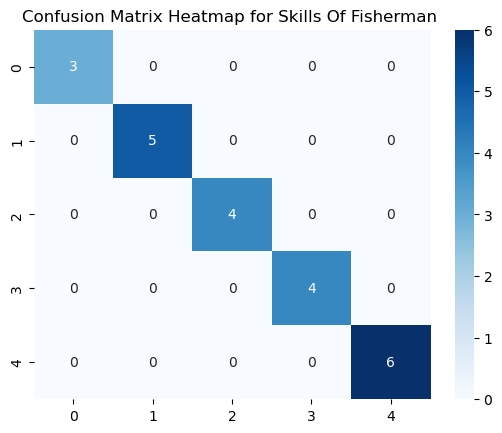

In [199]:
# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap for Skills Of Fisherman ')
plt.show()

In [200]:
from sklearn.svm import SVC


In [201]:
# Create a Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=10)


In [202]:
# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)


SVC(C=1, kernel='linear', random_state=10)

In [203]:
# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

In [204]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



In [205]:
conf_matrix = confusion_matrix(y_test, y_pred)


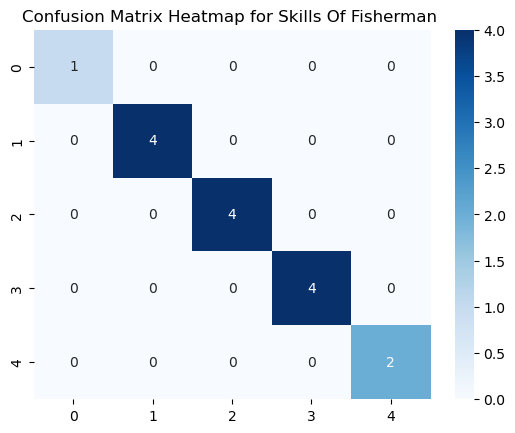

In [191]:
# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap for Skills Of Fisherman ')
plt.show()